In [41]:
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp
from ortools.init import pywrapinit
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [1]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

In [14]:
"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

In [15]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [23]:
type(manager.IndexToNode(1))

int

In [24]:
type(distance_callback(0, 4))

int

In [4]:
test= 'ceci est la branche master '

ValueError: could not convert string to float: '151603712,"The'

In [21]:
df = read_csv('/Users/nelsonortiz/Downloads/steam-200k.csv',header=None)
data = df.values
df

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [24]:
df=df.rename(columns={0:"id",1:"game",2:"Behaviour Label",3:"Value",4:"0"})
df

,id,game,Behaviour Label,Value,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [26]:
df[df["game"]=="Dota 2"]

,id,game,Behaviour Label,Value,0
42,151603712,Dota 2,purchase,1.0,0
43,151603712,Dota 2,play,0.5,0
66,187131847,Dota 2,purchase,1.0,0
67,187131847,Dota 2,play,2.3,0
855,176410694,Dota 2,purchase,1.0,0
...,...,...,...,...,...
199897,99096740,Dota 2,play,1704.0,0
199948,176449171,Dota 2,purchase,1.0,0
199949,176449171,Dota 2,play,1310.0,0
199960,221315846,Dota 2,purchase,1.0,0


array([[<AxesSubplot:title={'center':'Value'}>]], dtype=object)

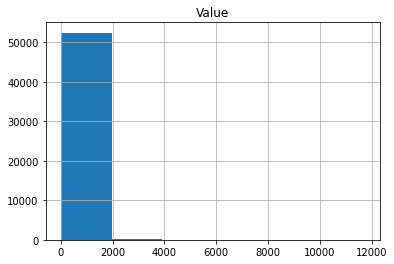

In [64]:
df_clean=df[df['Behaviour Label']=='play']
df_clean=df_clean[df_clean['Value']>1][['game','Value']]
df_clean.hist(bins=6)


In [ ]:
q